<a target="_blank" href="https://colab.research.google.com/github/tomas-gajarsky/facetorch/blob/main/notebooks/facetorch_notebook_demo.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Facetorch notebook demo


## Check GPU availability

In [1]:
# Check GPU availability
!nvidia-smi
# Edit -> Notebook settings -> Hardware accelerator



Thu Dec 14 17:52:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Add cell timer to the notebook

In [2]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
time: 231 µs (started: 2023-12-14 17:53:09 +00:00)


## Install dependencies

In [ ]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install "facetorch>=0.5.1" "torch==1.13.1+cu117" "torchvision==0.14.1+cu117" "torchaudio==0.13.1" --extra-index-url https://download.pytorch.org/whl/cu117

!pip list | grep facetorch

Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 806.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=d8fd385e10951669c85ddee3f220fbd408c1

## Download config and image

In [4]:
!wget -O ./test.jpg https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
!wget -O ./gpu.config.yml https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml

--2023-12-14 17:55:58--  https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg [following]
--2023-12-14 17:55:58--  https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg [following]
--2023-12-14 17:55:58--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443...

## Import packages

In [5]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

time: 1.61 s (started: 2023-12-14 17:55:59 +00:00)


## Configure

In [6]:
path_img_input="./test.jpg"
path_img_output="/test_output.jpg"
path_config="gpu.config.yml"


cfg = OmegaConf.load(path_config)

time: 161 ms (started: 2023-12-14 17:56:01 +00:00)


## Startup

In [7]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)

# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
        path_output=path_img_output,
    )

{"asctime": "2023-12-14 17:56:01,298", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2023-12-14 17:56:01,299", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2023-12-14 17:56:01,481", "levelname": "INFO", "message": "Initializing FaceDetector"}
Downloading...
From: https://drive.google.com/uc?&id=1eMuOdGkiNCOUTiEbKKoPCHGCuDgiKeNC&confirm=t
To: /opt/facetorch/models/torchscript/detector/1/model.pt
100%|██████████| 110M/110M [00:02<00:00, 50.2MB/s]
{"asctime": "2023-12-14 17:56:07,386", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2023-12-14 17:56:07,424", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2023-12-14 17:56:07,428", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
Downloading...
From: https://drive.google.com/uc?&id=19h3kqar1wlELAmM5hDyj9tlrUh8yjrCl&confirm=t
To: /opt/facetorch/models/torchscript/predictor/embed/1/model.pt
100%|██████████| 11

time: 49 s (started: 2023-12-14 17:56:01 +00:00)


## Inference

In [17]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2023-12-14 18:00:33,908", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2023-12-14 18:00:33,911", "levelname": "INFO", "message": "Reading image", "path_image": "./test.jpg"}
{"asctime": "2023-12-14 18:00:33,933", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2023-12-14 18:00:34,126", "levelname": "INFO", "message": "Number of faces: 4"}
{"asctime": "2023-12-14 18:00:34,127", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2023-12-14 18:00:34,131", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2023-12-14 18:00:34,133", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2023-12-14 18:00:34,146", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2023-12-14 18:00:34,171", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2023-12-14 18:00:34,221", "levelname": "INFO", "message": "Running FacePredictor: au"}
{"asctim

time: 990 ms (started: 2023-12-14 18:00:33 +00:00)


## Output image

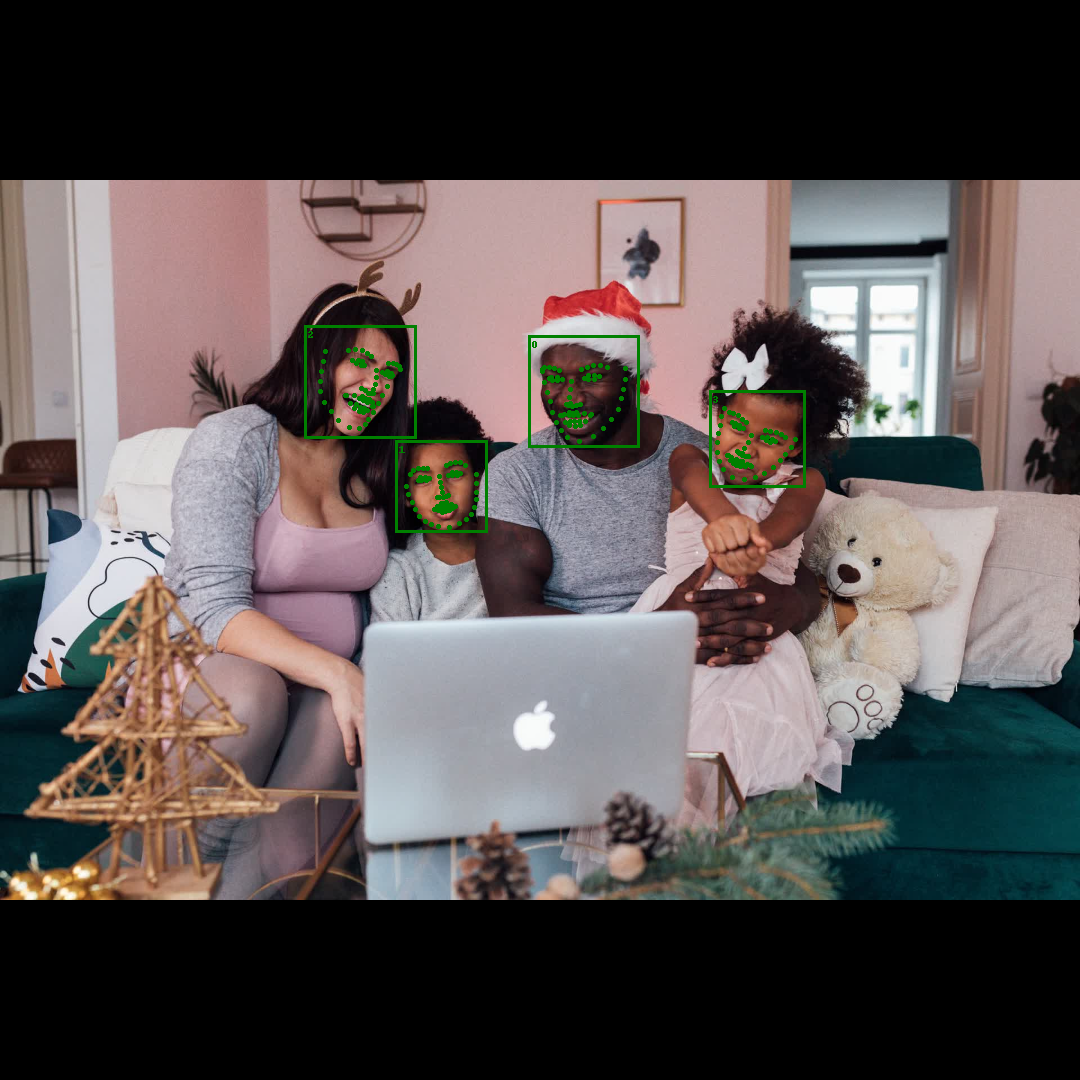

time: 232 ms (started: 2023-12-14 18:00:34 +00:00)


In [18]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

## Facial Expressions

In [19]:
{face.indx: face.preds["fer"].label for face in response.faces}


{0: 'Happiness', 1: 'Surprise', 2: 'Happiness', 3: 'Disgust'}

time: 2.56 ms (started: 2023-12-14 18:00:35 +00:00)


## Facial Action Unit Detection

In [20]:
{face.indx: face.preds["au"].other["multi"] for face in response.faces}


{0: ['lid_tightener',
  'nose_wrinkler',
  'upper_lip_raiser',
  'lip_corner_puller',
  'chin_raiser',
  'lips_part'],
 1: ['inner_brow_raiser',
  'outer_brow_raiser',
  'upper_lip_raiser',
  'lip_pucker'],
 2: ['lid_tightener',
  'nose_wrinkler',
  'upper_lip_raiser',
  'lip_corner_puller'],
 3: ['upper_lip_raiser', 'lip_pucker']}

time: 4.04 ms (started: 2023-12-14 18:00:35 +00:00)


## Facial Valence Arousal

In [21]:
{face.indx: face.preds["va"].other for face in response.faces}

{0: {'valence': 0.9772148728370667, 'arousal': 0.2926322102546692},
 1: {'valence': 0.22364261001348495, 'arousal': 0.0030725032091140775},
 2: {'valence': 0.9579311013221741, 'arousal': 0.31147159934043883},
 3: {'valence': 0.8746367692947388, 'arousal': 0.0072126269340515164}}

time: 4.14 ms (started: 2023-12-14 18:00:37 +00:00)


## Embedding cosine similarity

In [22]:
def compute_embed_similarity(predictor_name: str = "verify", base_face_id: int = 0) -> Dict:
  base_emb = response.faces[base_face_id].preds[predictor_name].logits
  sim_dict = {face.indx: cosine_similarity(base_emb, face.preds[predictor_name].logits, dim=0).item() for face in response.faces}
  sim_dict_sorted = dict(sorted(sim_dict.items(), key=operator.itemgetter(1),reverse=True))
  return sim_dict_sorted

time: 821 µs (started: 2023-12-14 18:00:37 +00:00)


### Face representation learning

In [23]:
compute_embed_similarity(predictor_name="embed")

{0: 1.0,
 3: 0.013703957200050354,
 1: -0.016045819967985153,
 2: -0.017361726611852646}

time: 5.36 ms (started: 2023-12-14 18:00:37 +00:00)


### Face verification

In [24]:
compute_embed_similarity(predictor_name="verify")

{0: 1.0,
 1: 0.1039777472615242,
 3: 0.06411682814359665,
 2: -0.09044305980205536}

time: 3.93 ms (started: 2023-12-14 18:00:38 +00:00)


## Full response

In [25]:
response

ImageData(path_input='./test.jpg', path_output='/test_output.jpg', img=tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), tensor=tensor([[[[-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          ...,
          [-104., -104., -104

time: 127 ms (started: 2023-12-14 18:00:39 +00:00)


time: 224 ms (started: 2023-12-14 17:57:59 +00:00)
